In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [4]:
# df_results = S21.loop_over_S21_files(r'Test_S21/')
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT361w2chip9nibbled_BF_20250423\S21\Power/'
# dir = r'Test_s21/'
df = S21.loop_over_S21_files(dir, kid=None, pread=110)
display(df)

c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIP

,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr
0,100,-110.0,0.100015,4.523123,1.377869e-04,5676.507484,602.040519,322181.841433,3.843245e+06,5778.315365,1357.132047,-94.970885,0.000262
1,101,-110.0,0.100067,4.528139,1.754388e-07,27370.606067,53.620753,60442.433112,9.713188e+01,50022.819249,138.014928,-74.039230,0.000008
2,102,-110.0,0.100027,4.531454,1.922231e-07,15177.746153,16.898287,26995.696035,2.579605e+01,34670.465332,61.209972,-75.660298,0.000006
3,103,-110.0,0.099982,4.541298,5.428430e-07,34795.749727,271.715565,323417.770541,1.980543e+03,38990.662490,319.702062,-79.238614,0.000006
4,104,-110.0,0.099998,4.543340,5.649602e-07,27974.013965,179.785706,223495.373128,1.150905e+03,31976.366755,217.080309,-79.529088,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,96,-110.0,0.099974,4.512902,1.002146e-06,29804.956798,366.958293,375563.884061,3.699844e+03,32374.190388,412.117024,-81.232567,0.000009
927,97,-110.0,0.100026,4.518320,3.446699e-07,36596.251893,193.233447,171877.301369,7.311489e+02,46496.276012,275.491132,-76.054952,0.000011
928,98,-110.0,0.100026,4.521126,7.636944e-07,25757.984435,205.999839,269802.653079,1.768600e+03,28476.641498,236.857093,-81.063723,0.000006
929,99,-110.0,0.099988,4.523298,6.182767e-06,23500.406691,1408.077549,335927.247594,8.016570e+04,25268.081687,1979.669560,-82.812443,0.000221


In [44]:
def fit(x, a, b):
    return a*x**(-2)+b 

509
7410861.976404907 -55603.40644966773


C:\Users\wilbertr\AppData\Local\Temp\ipykernel_41996\124147464.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, .5e6)


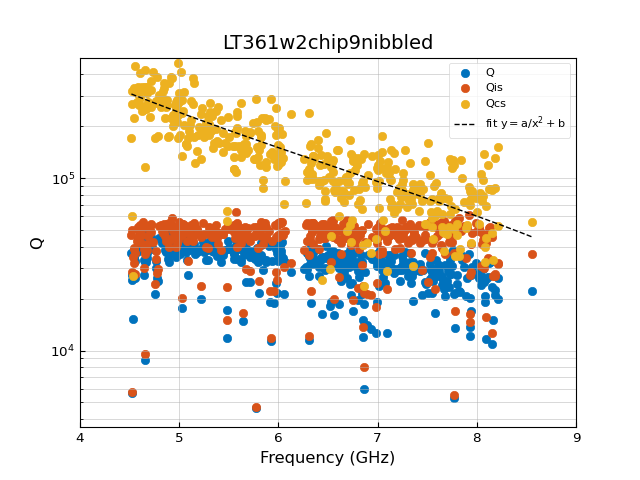

In [48]:
f0s = np.array(df_results['f0'])
Qs = np.array(df_results['Ql'])
Qis = np.array(df_results['Qi'])
Qcs = np.array(df_results['Qc'])

min_df = 0.002
df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0s[~too_close_mask], Qcs[~too_close_mask])
f0s_fit = np.linspace(f0s[~too_close_mask].min(), f0s[~too_close_mask].max(), 100)

fig, ax = plt.subplots()
ax.set_title('LT361w2chip9nibbled')
ax.set_yscale('log')
ax.scatter(f0s[~too_close_mask], Qs[~too_close_mask], label='Q')
ax.scatter(f0s[~too_close_mask], Qis[~too_close_mask], label='Qis')
ax.scatter(f0s[~too_close_mask], Qcs[~too_close_mask], label='Qcs')
ax.plot(f0s_fit, fit(f0s_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(0, .5e6)
ax.set_ylabel('Q')
ax.legend()
print(*popt)

Text(0, 0.5, 'Length coupler (um)')

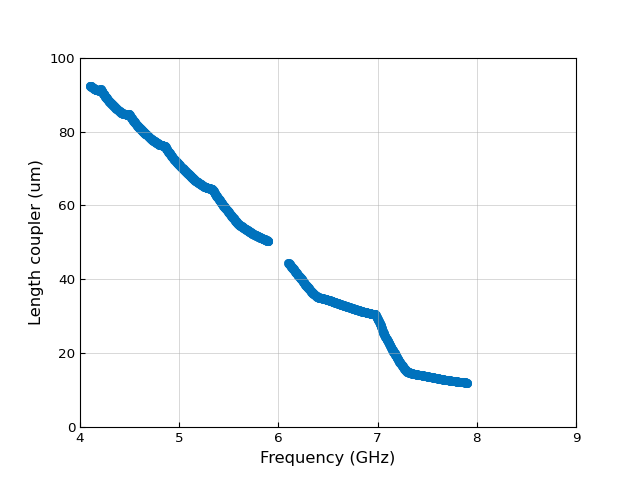

In [56]:
couplers = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_couplers.npy')
f0s_design = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_F0s.npy')*1e-9
fig, ax = plt.subplots()
ax.scatter(f0s_design, couplers)
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(0, 100)
ax.set_ylabel('Length coupler (um)')